In [37]:
import os
import yaml
import IPython.display
from PIL import ImageFont, ImageDraw, Image
from matplotlib import font_manager 

In [38]:
system_fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
for font in system_fonts:
    if "cjk" in font:
        print(font)

/usr/share/fonts/noto-cjk/NotoSansCJK-Light.ttc
/usr/share/fonts/noto-cjk/NotoSansCJK-Medium.ttc
/usr/share/fonts/noto-cjk/NotoSansCJK-DemiLight.ttc
/usr/share/fonts/noto-cjk/NotoSerifCJK-Light.ttc
/usr/share/fonts/noto-cjk/NotoSansCJK-Bold.ttc
/usr/share/fonts/noto-cjk/NotoSerifCJK-SemiBold.ttc
/usr/share/fonts/noto-cjk/NotoSerifCJK-Regular.ttc
/usr/share/fonts/noto-cjk/NotoSerifCJK-Medium.ttc
/usr/share/fonts/noto-cjk/NotoSerifCJK-Bold.ttc
/usr/share/fonts/noto-cjk/NotoSansCJK-Black.ttc
/usr/share/fonts/noto-cjk/NotoSerifCJK-ExtraLight.ttc
/usr/share/fonts/noto-cjk/NotoSerifCJK-Black.ttc
/usr/share/fonts/noto-cjk/NotoSansCJK-Thin.ttc
/usr/share/fonts/noto-cjk/NotoSansCJK-Regular.ttc


In [39]:
im_id = 600

In [40]:
with open("classes.yaml", 'r') as file:
    char_codes = yaml.safe_load(file)['names']

In [41]:
label_path = f"/home/anderu/Storage/Datasets/jp_ocr_YOLO/YOLO_train/dataset/labels/train/{im_id}.txt"
im_path = f"/home/anderu/Storage/Datasets/jp_ocr_YOLO/YOLO_train/dataset/images/train/{im_id}.png"

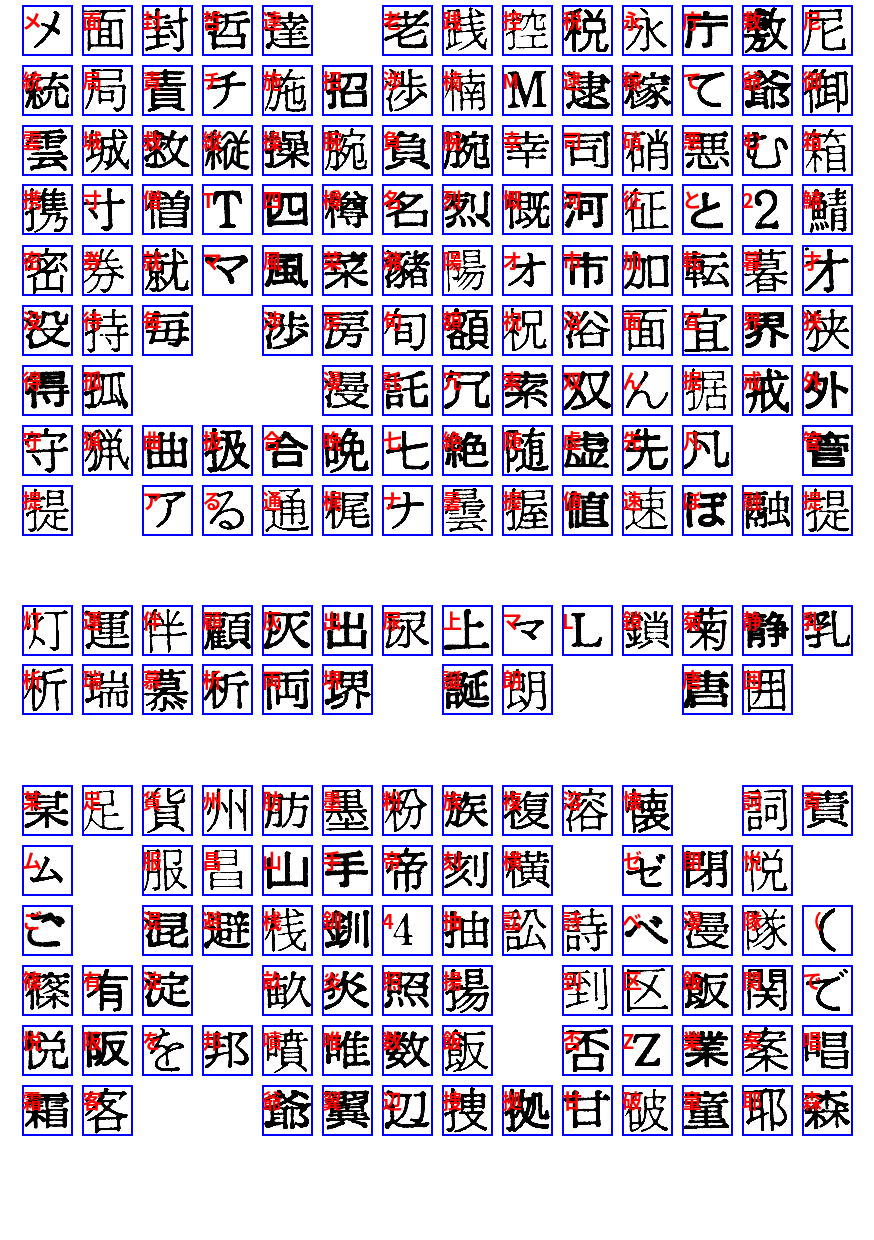

In [42]:
font = ImageFont.truetype('/usr/share/fonts/noto-cjk/NotoSansCJK-Bold.ttc', 20)

with open(label_path, "r") as labels:
    page = Image.open(im_path)
    draw = ImageDraw.Draw(page)
    for label in labels:
        label = label.split(" ")
        center = int(float(label[1]) * 874), int(float(label[2]) * 1240)
        draw.rectangle([(center[0] - 25, center[1] - 25), (center[0] + 25, center[1] + 25)], width = 2, outline="#0000ff")
        draw.text((center[0] - 25, center[1] - 25), chr(int(char_codes[int(label[0])], 16)), font=font, fill='red')
    page.save(f"dataset_examples/{im_id}.png")
IPython.display.Image(f"dataset_examples/{im_id}.png")